In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

sns.set()
%matplotlib inline

In [2]:
df_raw = pd.read_csv('./creditcard.csv')
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_raw.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df=df_raw.drop(['Time'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [6]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.shape


(284807, 30)

In [8]:
#check if there any duplication 
df.duplicated().sum()

9144

In [9]:
# drop duplication

df.drop_duplicates(df,inplace=True)

In [10]:
#  the shape 
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 275663 Rows and 30 columns


In [11]:
print(len(df[df['Class'] == 1]))
print(len(df[df['Class'] == 0]))

473
275190


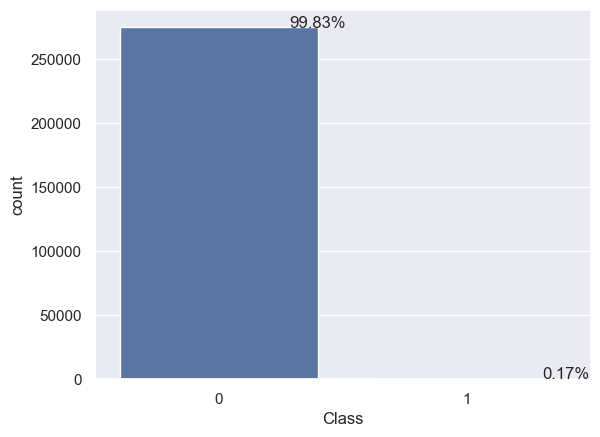

In [12]:
ax = sns.countplot(x='Class',data=df)
total = float(len(df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

In [13]:
df.corr()['Class'].sort_values()

V17      -0.317202
V14      -0.297550
V12      -0.253150
V10      -0.208104
V16      -0.188222
V3       -0.185772
V7       -0.173292
V18      -0.106447
V1       -0.094718
V9       -0.094583
V5       -0.088642
V6       -0.044777
V24      -0.006831
V23      -0.006206
V13      -0.003934
V15      -0.002824
V25       0.003593
V26       0.004341
V22       0.004612
Amount    0.005451
V28       0.009642
V20       0.021349
V27       0.021888
V21       0.026239
V8        0.033364
V19       0.033784
V2        0.084754
V4        0.130313
V11       0.151260
Class     1.000000
Name: Class, dtype: float64

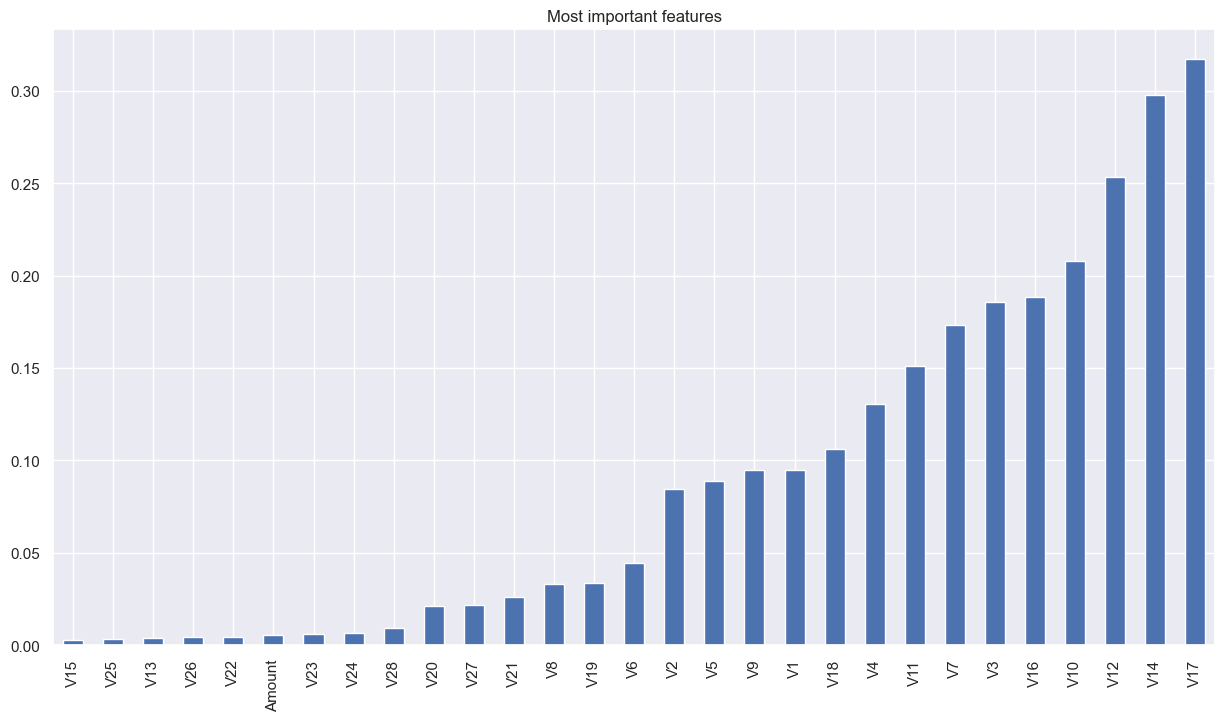

In [14]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [15]:
# c = df.corr()['Class'][:-1].abs() > 0.15

# print (c)

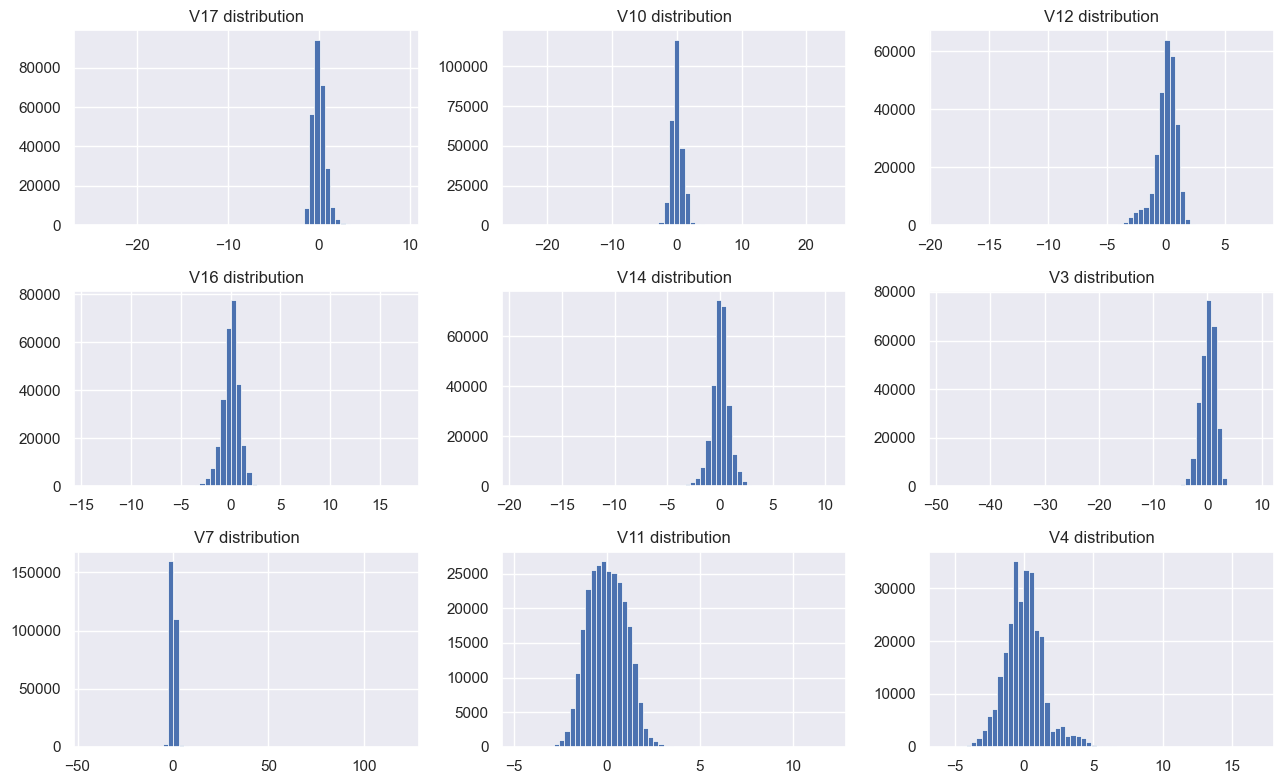

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [17]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_indices = []
    
    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # appending the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detecting outliers
Outliers_IQR = detect_outliers(df,2,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [18]:
len(Outliers_IQR)

45070

In [19]:
df_out

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230588,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
230589,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
230590,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
230591,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


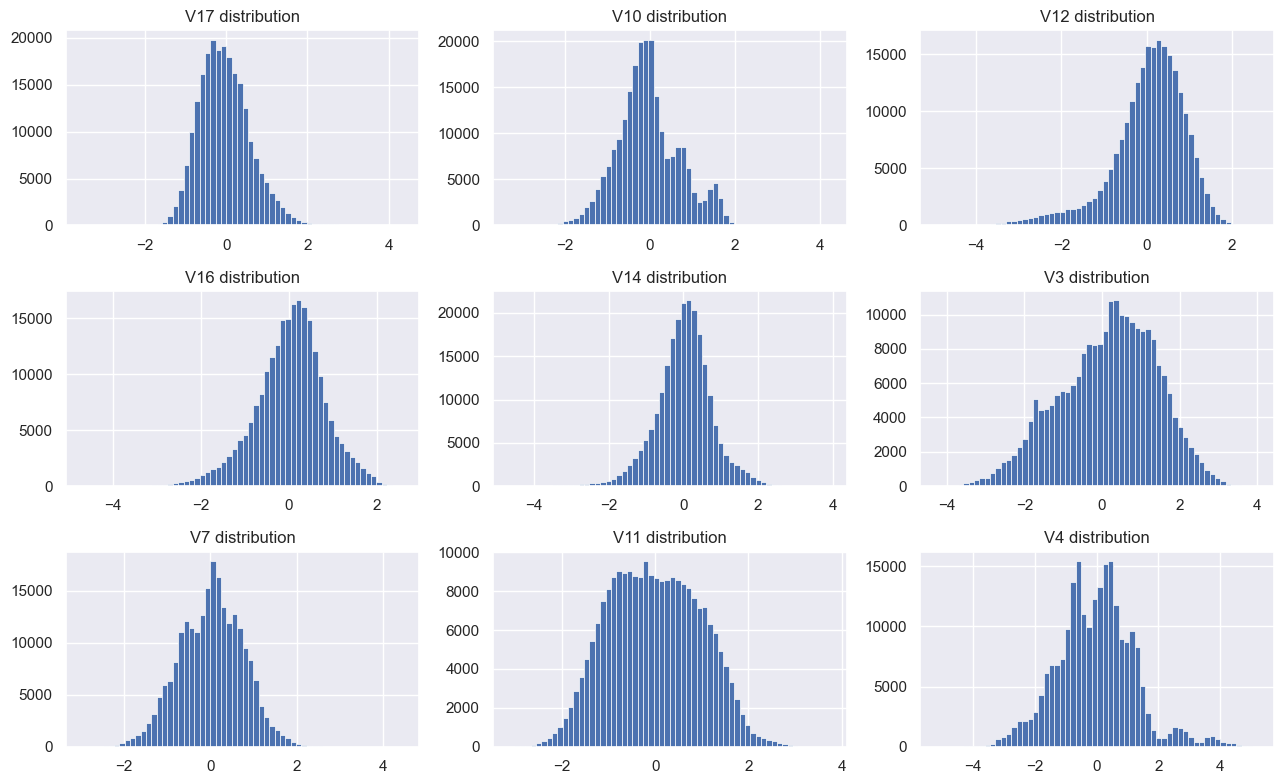

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))



axes[0,0].hist(df_out['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [21]:
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Class'] == 1]))

The amount of frauds in df before dropping outliers:  473


In [22]:
print ('The amount of frauds in df afret dropping outliers: ', len(df_out[df_out['Class'] == 1]))

The amount of frauds in df afret dropping outliers:  44


In [23]:
Outliers_df2 = df.loc[Outliers_IQR]

In [24]:
len(Outliers_df2)

45070

In [25]:
Outliers_df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
140,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
146,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,6.427802,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
164,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275573,-2.796570,-1.602426,0.553124,-0.972816,-0.090899,0.423694,0.037604,0.500683,-1.163213,-0.218494,...,-0.766574,-1.794549,-0.536869,0.233628,0.208626,-0.435249,0.509353,-0.512349,283.20,0
277296,-0.514141,0.949264,-1.164256,-0.687624,0.784550,1.162172,1.753924,-0.052698,0.015033,-0.785415,...,-0.209018,-0.107877,0.148562,-0.421933,-0.589293,0.238553,-0.676694,-0.584556,195.40,0
277581,-0.112954,0.944074,-2.352370,0.944593,0.767084,-0.491613,1.898752,0.062521,-1.224329,0.218670,...,0.714246,1.895837,0.441559,0.729273,-1.048663,-0.415093,0.407531,0.354169,197.72,0
280989,-0.303032,0.515443,-2.395964,-0.052680,0.454179,-1.607054,2.039611,-0.188682,-0.446324,-0.439347,...,0.671690,1.721186,0.444797,-0.004811,-1.012256,-0.141775,0.369032,0.314705,214.20,0


In [26]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import  classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC

### without outliers dataframe

In [27]:
X = Outliers_df2.drop('Class',axis=1).values
y = Outliers_df2['Class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (33802, 29)
X Test  :  (11268, 29)
Y Train :  (33802,)
Y Test  :  (11268,)


In [28]:
#Defined object from library Classification  / from the libraries import before / 6 model

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVC = SVC()


LogisticRegression() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.85      0.59      0.70       118

    accuracy                           0.99     11268
   macro avg       0.92      0.80      0.85     11268
weighted avg       0.99      0.99      0.99     11268



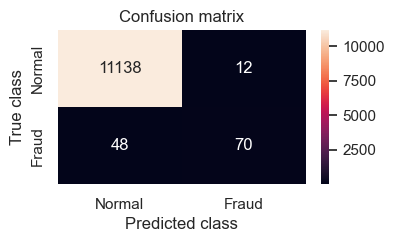

DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.79      0.79      0.79       118

    accuracy                           1.00     11268
   macro avg       0.89      0.89      0.89     11268
weighted avg       1.00      1.00      1.00     11268



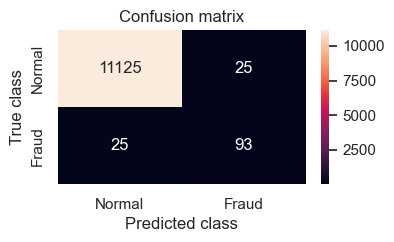

RandomForestClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.94      0.86      0.90       118

    accuracy                           1.00     11268
   macro avg       0.97      0.93      0.95     11268
weighted avg       1.00      1.00      1.00     11268



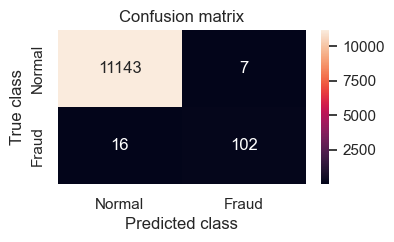

KNeighborsClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.90      0.84      0.87       118

    accuracy                           1.00     11268
   macro avg       0.95      0.92      0.93     11268
weighted avg       1.00      1.00      1.00     11268



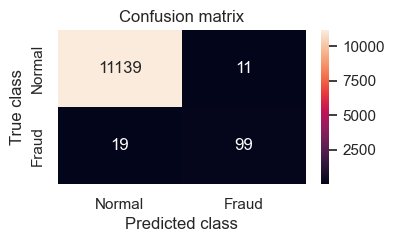

SVC() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.80      0.86      0.83       118

    accuracy                           1.00     11268
   macro avg       0.90      0.93      0.91     11268
weighted avg       1.00      1.00      1.00     11268



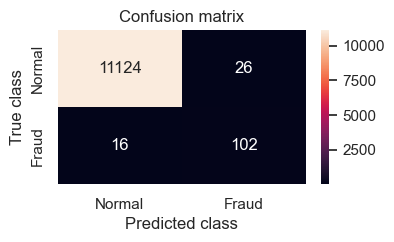

MLPClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.85      0.81      0.83       118

    accuracy                           1.00     11268
   macro avg       0.92      0.91      0.91     11268
weighted avg       1.00      1.00      1.00     11268



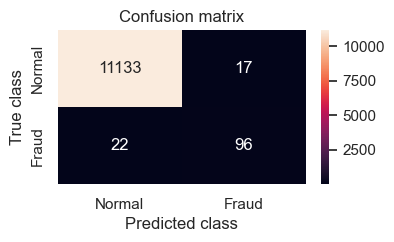

In [29]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,SVC,MLP]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    LABELS = ['Normal', 'Fraud'] 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, ypred) 
    plt.figure(figsize =(4, 2)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()
    
    print("=======================================")

### Evaluate 1 Model Before ParamTuning

In [30]:

model = KNR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])
    
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
# Calculate mean accuracy
mean_accuracy = scores.mean()
    
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = pipeline.predict(X_test)
    
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
    
print("Model:", model)
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best_model = pipeline

Model: KNeighborsClassifier()
Cross-validation Accuracy: 0.997840354837044
Test Accuracy: 0.9973375931842385
Recall Score:  0.8389830508474576
Precision Score:  0.9
F1 Score:  0.868421052631579


## Hyperparameters Tuning Model Optimization

In [84]:
# import model Feature selection for choice number of columns depends on the correlation between the values and the output

from sklearn.feature_selection import SelectPercentile, f_classif

In [85]:
# we need choice 50 % of the feature

F_50 = SelectPercentile( percentile= 50)

In [86]:

set_X = F_50.fit_transform(X_train,y_train)

### Feature Selection

In [87]:
#now choice 50% of the original data and put in the new DataFrame and put the same header name from the original data

new_x =pd.DataFrame(set_X,columns= [ i for i,j in zip (Outliers_df2.columns, F_50.get_support()) if j == True ])

new_x

,V2,V8,V9,V10,V11,V12,V13
0,-4.660656,0.068081,-0.978932,-1.647964,1.298459,0.352873,0.786771
1,0.040232,1.226294,1.593467,0.345305,-0.159414,0.007056,0.227424
2,1.905199,-1.630776,0.262421,-0.234547,0.597708,-0.816132,0.798790
3,-15.930586,2.362488,4.021344,-0.229003,-3.661824,5.196516,-2.571068
4,1.957783,-0.533764,-0.251231,0.228743,-1.108925,0.233866,-0.741284
...,...,...,...,...,...,...,...
33797,-2.939641,0.695930,-0.433800,-0.741873,1.262604,-2.423127,0.690539
33798,-0.306670,1.072880,-2.163124,-0.838362,-0.782689,-0.257532,-0.195459
33799,1.192689,-0.622658,-1.160908,-1.682067,-0.022377,0.423426,0.585983
33800,-0.658130,3.904856,-0.177924,0.700598,-0.946840,0.414496,-0.667778


In [73]:
X = new_x.values

y= Outliers_df2['Class'].values

print(X)
print(y)

[[ 1.18630463  0.34517283  0.91722987 ... -0.47912993  0.47200411
  -0.72548094]
 [ 3.402585   -0.61431203  0.38492658 ... -1.24682941 -0.21343753
  -0.10022174]
 [-3.45803356 -0.30548272 -1.47338308 ...  0.89981073  1.47175274
  -0.14479336]
 ...
 [-2.3523702   0.21866961  0.41318722 ...  1.49624342 -0.98688895
  -0.05983356]
 [-2.39596419 -0.43934738 -1.35067119 ...  1.36674156 -1.10765117
   0.11030248]
 [-2.78496905  0.10236111 -0.75869368 ...  1.20255681 -0.13085232
  -0.46146328]]
[0 0 0 ... 0 0 0]


In [89]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (33802, 7)
X Test  :  (11268, 7)
Y Train :  (33802,)
Y Test  :  (11268,)


LogisticRegression() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.84      0.64      0.73       118

    accuracy                           1.00     11268
   macro avg       0.92      0.82      0.86     11268
weighted avg       0.99      1.00      0.99     11268



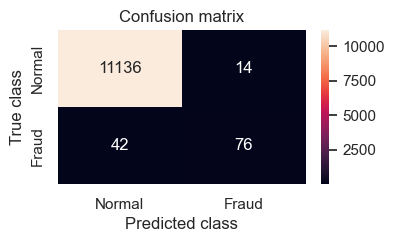

DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.82      0.82      0.82       118

    accuracy                           1.00     11268
   macro avg       0.91      0.91      0.91     11268
weighted avg       1.00      1.00      1.00     11268



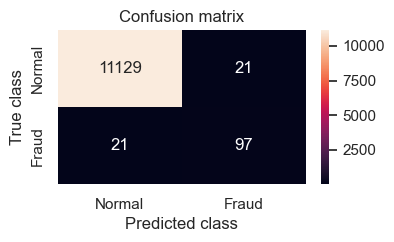

RandomForestClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.89      0.86      0.88       118

    accuracy                           1.00     11268
   macro avg       0.94      0.93      0.94     11268
weighted avg       1.00      1.00      1.00     11268



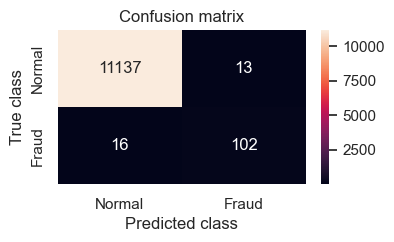

KNeighborsClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.91      0.88      0.90       118

    accuracy                           1.00     11268
   macro avg       0.96      0.94      0.95     11268
weighted avg       1.00      1.00      1.00     11268



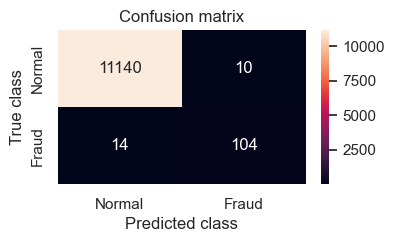

SVC() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.91      0.86      0.88       118

    accuracy                           1.00     11268
   macro avg       0.95      0.93      0.94     11268
weighted avg       1.00      1.00      1.00     11268



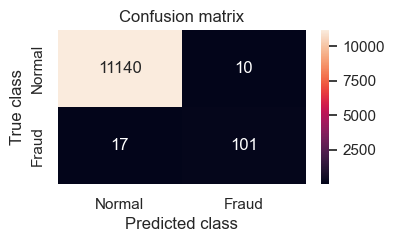

MLPClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11150
           1       0.82      0.87      0.85       118

    accuracy                           1.00     11268
   macro avg       0.91      0.94      0.92     11268
weighted avg       1.00      1.00      1.00     11268



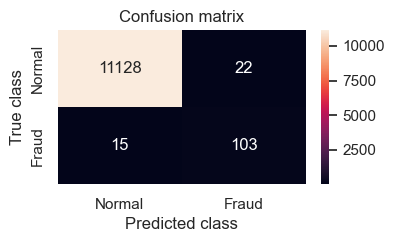

In [90]:
li = [LR,DTR,RFR,KNR,SVC,MLP]

    
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    LABELS = ['Normal', 'Fraud'] 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, ypred) 
    plt.figure(figsize =(4, 2)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()
    
    print("=======================================")

### Evaluate 1 Model After ParamTuning

In [99]:

model = KNR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])
    
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
# Calculate mean accuracy
mean_accuracy = scores.mean()
    
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = pipeline.predict(X_test)
    
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
    
print("Model:", model)
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best_model = pipeline

Model: KNeighborsClassifier()
Cross-validation Accuracy: 0.9980770237237759
Test Accuracy: 0.9978700745473909
Recall Score:  0.8813559322033898
Precision Score:  0.9122807017543859
F1 Score:  0.8965517241379309


In [98]:

# def train_random_forest(data, target):
#     # Dictionary to store LabelEncoders for each categorical column
#     label_encoders = {}

#     # split the data into X and y
#     X = data
#     y = target

#     # split the data into train and test
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#     # # Scaling Data
#     # scaler = MinMaxScaler()
#     # X_train = scaler.fit_transform(X_train)
#     # X_test = scaler.transform(X_test)

#     # Define the Random Forest model
#     rf_model = RandomForestClassifier(random_state=0,class_weight='balanced')

#     # Define hyperparameters for tuning
#     param_grid = {
#         'n_estimators': [50, 100, 150],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     }

#     # Perform GridSearchCV for hyperparameter tuning
#     grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
#     grid_search.fit(X_train, y_train)

#     # Get the best model and parameters
#     best_rf_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_

#     # Print the best hyperparameters
#     print('Best Hyperparameters:')
#     print(best_params)

#     # Train the model on the full training set
#     best_rf_model.fit(X_train, y_train)

#     # Evaluate the model on the test set
#     y_pred_rf = best_rf_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred_rf)
#     precision = precision_score(y_test, y_pred_rf)
#     recall = recall_score(y_test, y_pred_rf)

#     print(f'Accuracy on Test Set: {accuracy:.2f}')
#     print(f'Precision on Test Set: {precision:.2f}')
#     print(f'Recall on Test Set: {recall:.2f}')
    
#     #visulalizing the confusion matrix
#     LABELS = ['Normal', 'Fraud'] 
#     from sklearn.metrics import confusion_matrix
#     conf_matrix = confusion_matrix(y_test, y_pred_rf) 
#     plt.figure(figsize =(12, 12)) 
#     sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
#     plt.title("Confusion matrix") 
#     plt.ylabel('True class') 
#     plt.xlabel('Predicted class') 
#     plt.show()

#     return best_rf_model, best_params, accuracy

In [39]:
# train_random_forest(new_x, y)